# Generating Graphs from Nodes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

from utils import *
sys.path.append("../lightning_modules")

In [3]:
from torch_geometric.data import Data
from NodeGAN.Models.gan_gnn import GanGNN

## Model Setup

In [4]:
with open("nodeGAN_config.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [5]:
model = GanGNN(hparams)

In [10]:
model.setup(stage="fit")

Setting up dataset


## Training

In [ ]:
logger = WandbLogger(project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"])
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Setting up dataset


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | generator     | GeneratorGNN     | 66.2 K
1 | discriminator | DiscriminatorGNN | 58.9 K
---------------------------------------------------
125 K     Trainable params
0         Non-trainable params
125 K     Total params
0.501     Total estimated model params size (MB)


/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:394: UserWarning: The number of training samples (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:  50%|█████     | 10/20 [00:01<00:01,  8.54it/s, loss=0.854, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 1:  50%|█████     | 10/20 [00:01<00:01,  8.55it/s, loss=0.983, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 2:   0%|          | 0/20 [00:00<?, ?it/s, loss=0.983, v_num=duhi]         

/global/u2/d/danieltm/Side_Work/GraphGAN/notebooks/../lightning_modules/NodeGAN/gnn_base.py:164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(3, 3))


Epoch 2:  50%|█████     | 10/20 [00:01<00:01,  7.61it/s, loss=1.06, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 3:  50%|█████     | 10/20 [00:01<00:01,  7.55it/s, loss=1.19, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 4:  50%|█████     | 10/20 [00:01<00:01,  8.31it/s, loss=1.25, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 5:  50%|█████     | 10/20 [00:01<00:01,  6.09it/s, loss=1.13, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 6:  50%|█████     | 10/20 [00:01<00:01,  8.25it/s, loss=1.23, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 7:  50%|█████     | 10/20 [00:01<00:01,  7.69it/s, loss=1.35, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 8:  50%|█████     | 10/20 [00:01<00:01,  7.66it/s, loss=1.52, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 9:  50%|█████     | 10/20 [00:01<00:01,  7.72it/s, loss=1.67, v_num=duhi]
Validating: 0it [00:00, ?it/s]
Epoch 10:  50%|█████     | 10/20 [00:01<00:01,  7.44it/s, loss=1.81, v_num=duhi]
Validating: 0it [00:00, ?it/s]


## Visualise Examples

In [18]:
from matplotlib.pyplot import cm

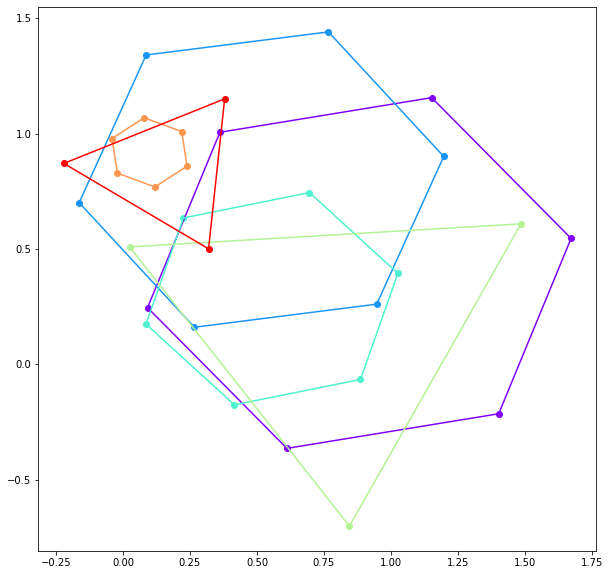

In [19]:
n=6

color = iter(cm.rainbow(np.linspace(0, 1, n)))

plt.figure(figsize=(10,10))
for polygon in model.valset[:n]:
    c = next(color)
    plt.scatter(polygon.x.T[0], polygon.x.T[1], color=c);
    plt.plot(polygon.x[:, 0][polygon.edge_index], polygon.x[:, 1][polygon.edge_index], c=c); 
    